How to minimize cost??

Cost funcion in pure python

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()

Cost = Σ(Wxi - yi)^2/m for i = 1 to i = m

In [26]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W*X[i] - Y[i])**2
    return c / len(X)

In [27]:
for feed_w in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_w, X, Y)
    print("{:6.3f} | {:18.5f}".format(feed_w, curr_cost))

-3.000 |           74.66667
-2.429 |           54.85714
-1.857 |           38.09524
-1.286 |           24.38095
-0.714 |           13.71429
-0.143 |            6.09524
 0.429 |            1.52381
 1.000 |            0.00000
 1.571 |            1.52381
 2.143 |            6.09524
 2.714 |           13.71429
 3.286 |           24.38095
 3.857 |           38.09524
 4.429 |           54.85714
 5.000 |           74.66667


Cost funcion in TensorFlow

In [28]:
def cost_func(W, X, Y):
    hypothesis = W * X
    return tf.reduce_mean(tf.square(hypothesis - Y))

W = np.linspace(-3, 5, num=15)
cost_value = []

for feed_w in W:
    curr_cost = cost_func(feed_w, X, Y)
    cost_value.append(curr_cost)
    print("{:6.3f} | {:18.5f}".format(feed_w, curr_cost))

-3.000 |           74.66667
-2.429 |           54.85714
-1.857 |           38.09524
-1.286 |           24.38095
-0.714 |           13.71429
-0.143 |            6.09524
 0.429 |            1.52381
 1.000 |            0.00000
 1.571 |            1.52381
 2.143 |            6.09524
 2.714 |           13.71429
 3.286 |           24.38095
 3.857 |           38.09524
 4.429 |           54.85714
 5.000 |           74.66667


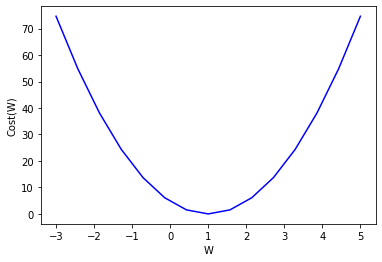

In [29]:
plt.plot(W, cost_value, "b")
plt.xlabel("W")
plt.ylabel("Cost(W)")
plt.show()

Gradien descent:

    Cost = Σ(Wxi - yi)^2/m for i = 1 to i = m => 미분!
        => Cost' = Σ(Wxi - yi)xi/m for i = 1 to i
        
    So.
        W0 = W, a = Learning rate = 0.01
        W1 = W0 - aΣ(W0xi - yi)xi/m for i = 1 to i
        W2 = W1 - aΣ(W0xi - yi)xi/m for i = 1 to i
                     .
                     .
                     .
       위와 같은 방법을 진행하면 위의 그래프의 꼭짓점에 최대한
       근사하게 될 것이고 그것이 X인풋에 대한 최적의 예상 점

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0000297], dtype=float32)>

In [36]:
tf.set_random_seed(0) # 랜덤 시드 초기화, 다음에 코드를 다시 실행해도 
                        # 똑같은 값 리턴
    
W = tf.Variable(tf.random_normal([1],-100, 100)) #-100부터 100사이의 숫자 "하나" 
alpha = 0.01 # Learning rate


for step in range(300):
    hypothesis = W*X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


W(Weight) 값이 1로 수렴할수록 Cost는 0에 수렴한다. 즉 X = [1, 2, 3] 과
Y = [1, 2, 3] 이 이루는 직선의 방정식의 기울기는 1이라는 것